# Importing the Libraries

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Importing the Dataset

In [2]:
data = "https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv"

In [6]:
df = pd.read_csv(data)

In [7]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


# EDA - Exploratory Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


No null values with poper dtypes for features

In [9]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


1. Average temp for the dataset is 22.23
2. Average revenue is 521.57
3. The range of temp lies b/w 0 to 45
4. The range of revenue b/w 10 to 1000



<Axes: >

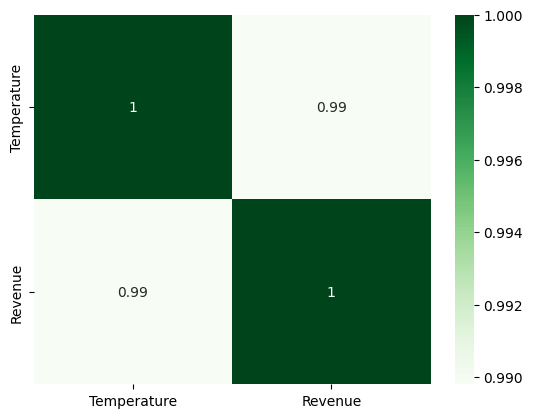

In [55]:
sns.heatmap(df.corr(),annot=True,cmap='Greens')

Heatmap shows a strong positive correaltion between the data the target and feature column

# Splitting the Data

In [16]:
x = np.array(df['Temperature']).reshape(-1,1)
y = np.array(df['Revenue']).reshape(-1,1)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=4,test_size=0.05)

# Model Selection

In [22]:
regressor = RandomForestRegressor()

# Training the Model

In [ ]:
regressor.fit(x_train,y_train)

# Testing the Model

In [30]:
user_test = regressor.predict(np.array(29.13).reshape(-1,1))

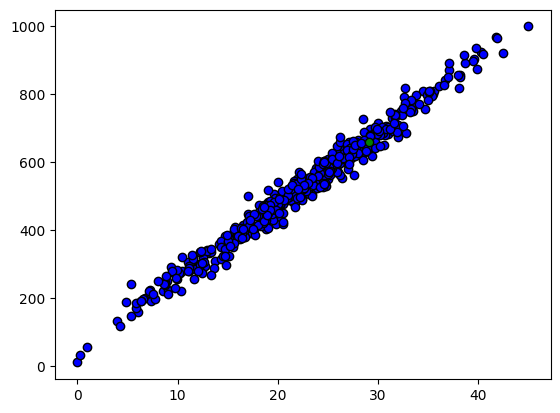

In [41]:
plt.scatter(x_train,y_train,color='b',marker='o',edgecolors='black')
plt.scatter(np.array(29.13).reshape(-1,1),user_test,color='g',marker='o',edgecolors='black')
# plt.plot([0,np.array(29.13).reshape(-1,1)],[user_test,user_test],color='r')

In [46]:
pred = regressor.predict(x_test)

In [50]:
testing_df = pd.DataFrame({'actual_value':y_test.copy().reshape(-1),'predicted_value':pred.copy().reshape(-1)})

In [51]:
testing_df.head()

,actual_value,predicted_value
0,496.011295,455.860408
1,319.402903,327.728521
2,702.901717,663.153239
3,574.423310,629.931694
4,276.787086,301.232998


In [52]:
testing_df.describe()

,actual_value,predicted_value
count,25.000000,25.000000
mean,494.784311,491.321947
std,197.057091,176.557382
min,71.160153,137.464620
25%,333.334258,345.395286
50%,507.356810,473.621049
75%,629.893792,657.468237
max,828.296077,800.199315


The mean value b/w the actual and predicted feature has an error of: 0.699%

Text(0, 0.5, 'Revenue')

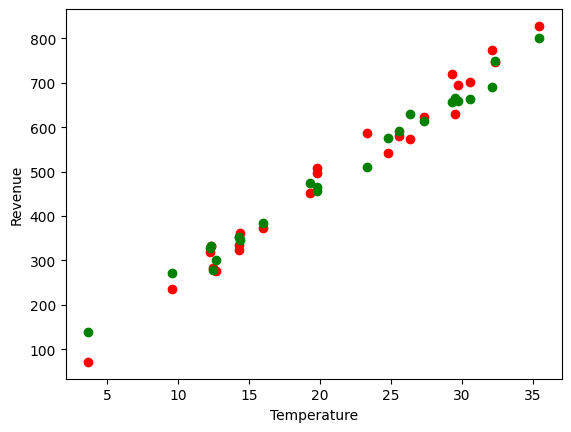

In [56]:
plt.scatter(x_test,y_test, color='red')
plt.scatter(x_test,pred, color='green')
plt.xlabel("Temperature")
plt.ylabel("Revenue")

# Checking the Accuracy

In [54]:
r2_score(y_test,pred)

0.9593140704243877

The model has an accuracy of 95.93% on an unseen data